<a href="https://colab.research.google.com/github/imdhanush13/Enhancing-Dysarthria-Diagnosis-/blob/main/DYSARTHIA_DETECTION_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from IPython.display import Audio
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import librosa
import librosa.display
from sklearn.preprocessing import minmax_scale
import IPython.display as ipd

from tqdm import tqdm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, recall_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Conv2D, MaxPooling2D, Dense, Flatten, LSTM, GRU, Bidirectional, SimpleRNN
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

from sklearn.metrics import accuracy_score,log_loss, confusion_matrix,ConfusionMatrixDisplay

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
pip install opendatasets

In [ ]:
import opendatasets as od

In [ ]:
od.download("https://www.kaggle.com/datasets/iamhungundji/dysarthria-detection/data")

Skipping, found downloaded files in "./dysarthria-detection" (use force=True to force download)


In [ ]:
dirname='/content/dysarthria-detection'

In [ ]:
import os
d = pd.read_csv("/content/dysarthria-detection/torgo_data/data.csv")
d['filename'] = d['filename'].apply(lambda x: os.path.join(dirname,x))
d

,is_dysarthria,gender,filename
0,non_dysarthria,female,/content/dysarthria-detection/torgo_data/non_d...
1,non_dysarthria,female,/content/dysarthria-detection/torgo_data/non_d...
2,non_dysarthria,female,/content/dysarthria-detection/torgo_data/non_d...
3,non_dysarthria,female,/content/dysarthria-detection/torgo_data/non_d...
4,non_dysarthria,female,/content/dysarthria-detection/torgo_data/non_d...
...,...,...,...
1995,dysarthria,male,/content/dysarthria-detection/torgo_data/dysar...
1996,dysarthria,male,/content/dysarthria-detection/torgo_data/dysar...
1997,dysarthria,male,/content/dysarthria-detection/torgo_data/dysar...
1998,dysarthria,male,/content/dysarthria-detection/torgo_data/dysar...


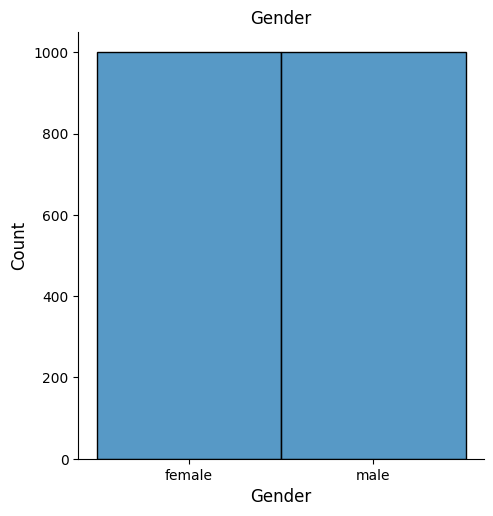

In [ ]:
sns.displot( d.gender)
plt.title('Gender')
plt.ylabel('Count', size=12)
plt.xlabel('Gender', size=12)
plt.show()

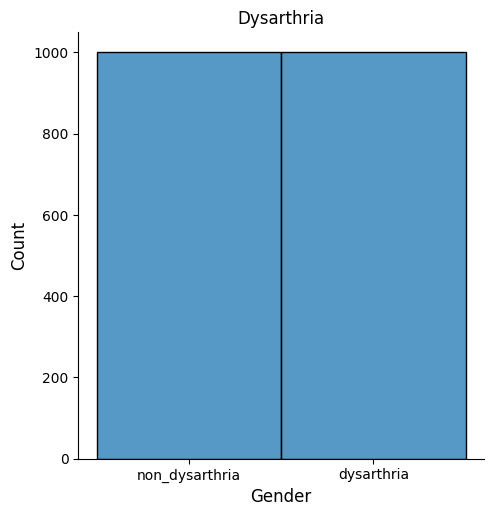

In [ ]:
sns.displot( d.is_dysarthria)
plt.title('Dysarthria')
plt.ylabel('Count', size=12)
plt.xlabel('Gender', size=12)
plt.show()

In [ ]:
def create_waveplot(data, sr, i):
    plt.figure(figsize=(10, 3))
    plt.title('Waveplot for audio with {}'.format(i), size=15)
    librosa.display.waveshow(data, sr=sr)
    plt.show()

def create_mel_Spectogram(data, sr, i):
    plt.figure(figsize=(10, 3))
    plt.title('Mel Spectrogram of audio {} emotion'.format(i), size=15)
    mel_spec = librosa.feature.melspectrogram(y=data, sr=sr)
    librosa.display.specshow(mel_spec, sr=sr, x_axis='time')
    plt.show()
def create_Spectogram(data, sr, i):

    plt.figure(figsize=(10, 3))
    plt.title('Spectrogram of audio {} '.format(i), size=15)
    X = librosa.stft(data)

    Xdb = librosa.amplitude_to_db(abs(X))
    librosa.display.specshow(Xdb,sr = sr, x_axis="time",y_axis = "log")
    plt.show()


def create_Zero_crossing_rate(data, sr, i):

    zero_crossings = librosa.zero_crossings(data)
    print("Sum of zero crossing ", zero_crossings.sum())
    plt.figure(figsize=(10, 3))
    plt.title('Zero Crossing Rate of audio {} '.format(i), size=15)
    zcrs = librosa.feature.zero_crossing_rate(data)
    plt.plot(zcrs[0])
    plt.show()
def create_mfcc(data, sr, i):

    plt.figure(figsize=(10, 3))
    plt.title('MFCC of audio {} '.format(i), size=15)
    mfccs = librosa.feature.mfcc(y=data, sr=sr)
    librosa.display.specshow(mfccs, sr=sr, x_axis='time')
    plt.show()

def create_Spectral_rolloff(data, sr, i):

    plt.figure(figsize=(10, 3))
    plt.title('Spectral Rolloff of audio {} '.format(i), size=15)
    spectral_rolloff = librosa.feature.spectral_rolloff(y=data, sr=sr)[0]
    frames = range(len(spectral_rolloff))
    t = librosa.frames_to_time(frames)
    librosa.display.waveshow(data, sr=sr, alpha=0.4)
    plt.plot(t, spectral_rolloff, color='r')
    plt.show()


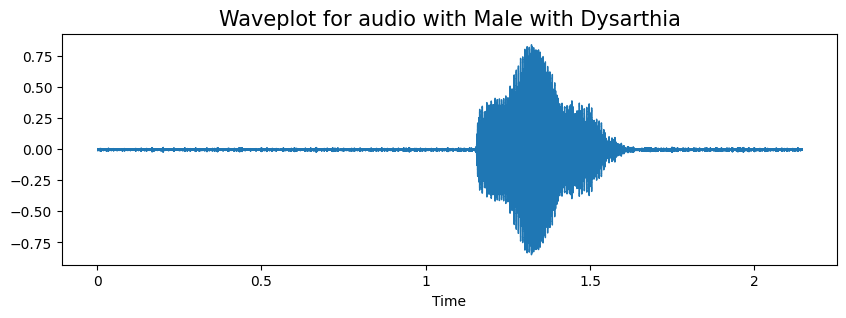

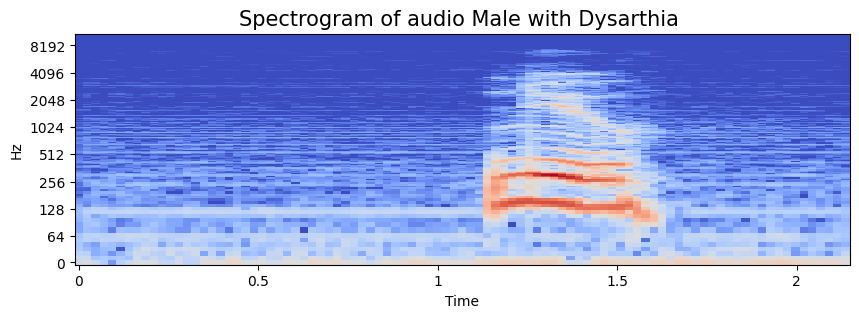

Sum of zero crossing  1372


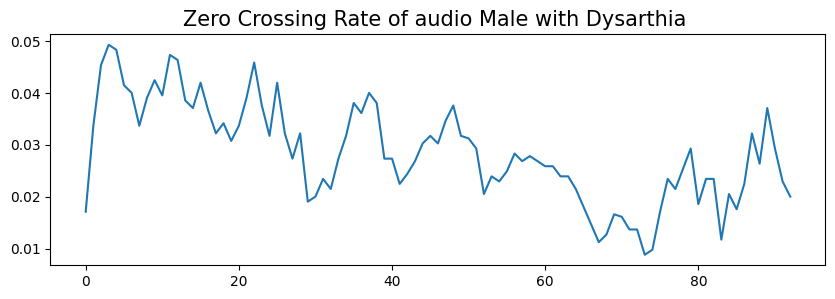

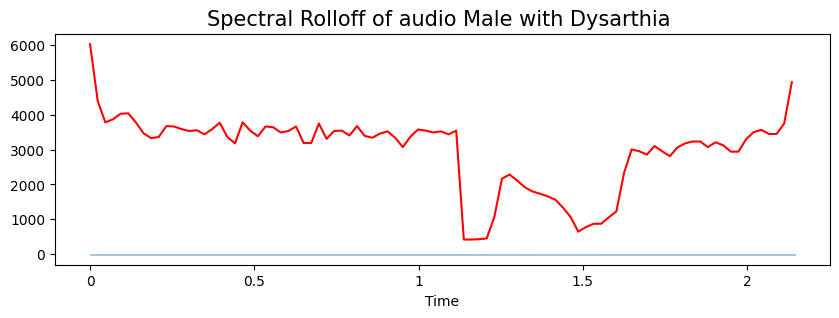

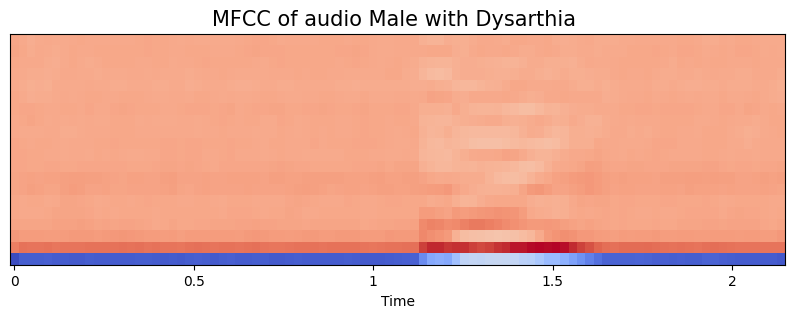

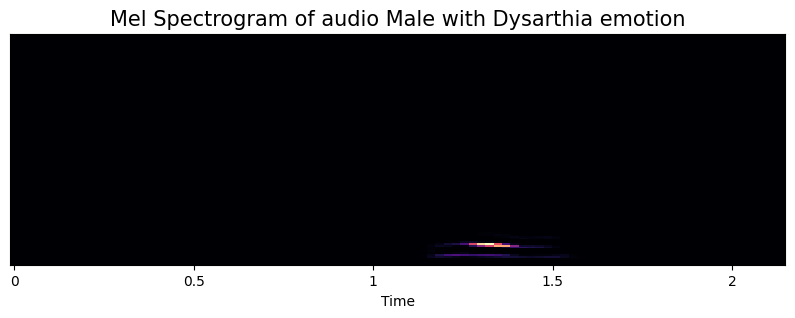

In [ ]:

dysarthricMALE = d[(d['gender']=='male') & (d['is_dysarthria']=='dysarthria') ]
DM = dysarthricMALE.sample()
x= DM.iloc[0].filename
info= "Male with Dysarthia"
data, sampling_rate = librosa.load(x)
create_waveplot(data, sampling_rate, info)
create_Spectogram(data, sampling_rate, info)
create_Zero_crossing_rate(data, sampling_rate, info)
create_Spectral_rolloff(data, sampling_rate, info)
create_mfcc(data, sampling_rate, info)
create_mel_Spectogram(data, sampling_rate, info)
Audio(x)

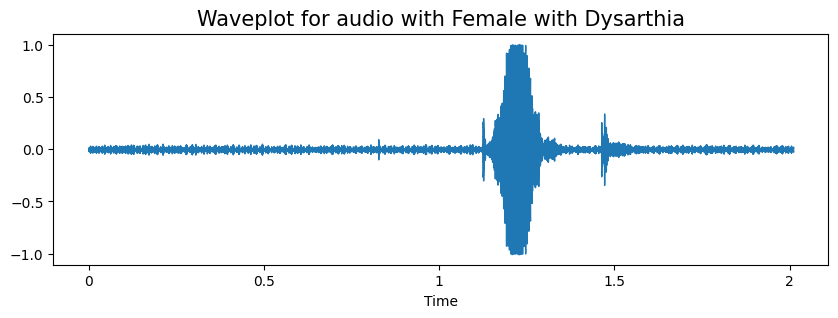

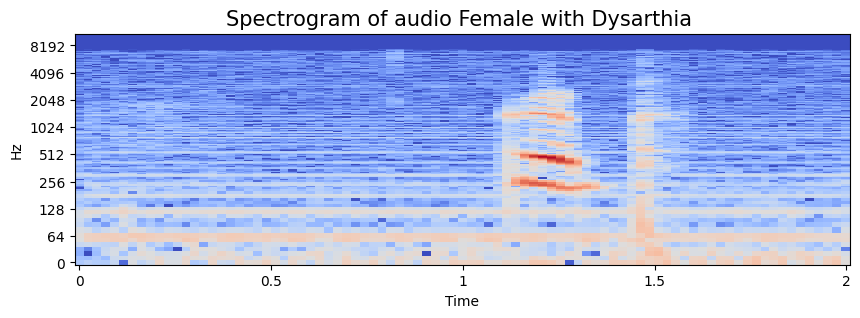

Sum of zero crossing  4005


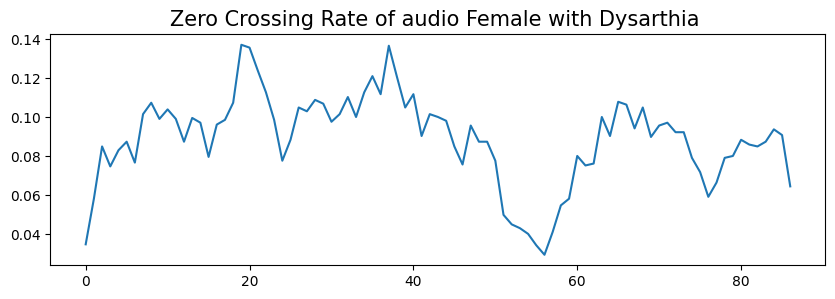

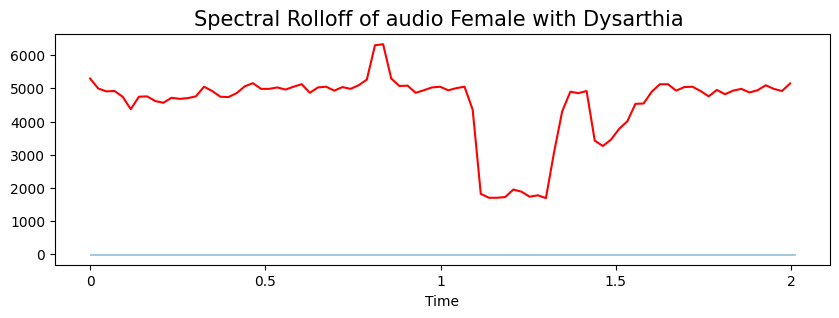

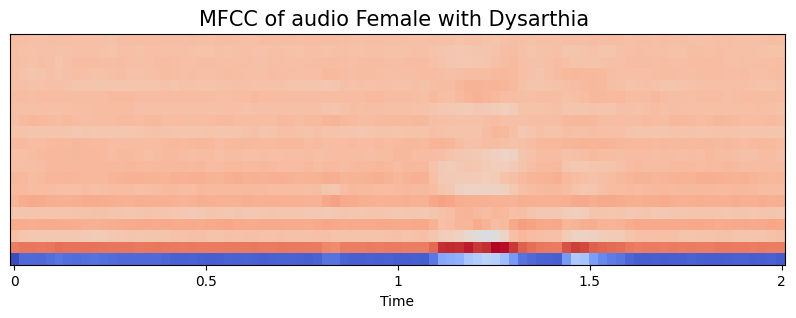

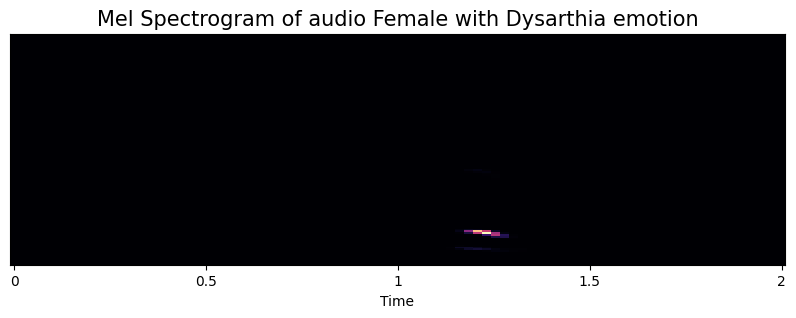

In [ ]:

dysarthricFemale = d[(d['gender']=='female') & (d['is_dysarthria']=='dysarthria')]

DF = dysarthricFemale.sample()
x= DF.iloc[0].filename

info= "Female with Dysarthia"
data, sampling_rate = librosa.load(x)
create_waveplot(data, sampling_rate, info)
create_Spectogram(data, sampling_rate, info)
create_Zero_crossing_rate(data, sampling_rate, info)
create_Spectral_rolloff(data, sampling_rate, info)
create_mfcc(data, sampling_rate, info)
create_mel_Spectogram(data, sampling_rate, info)
Audio(x)

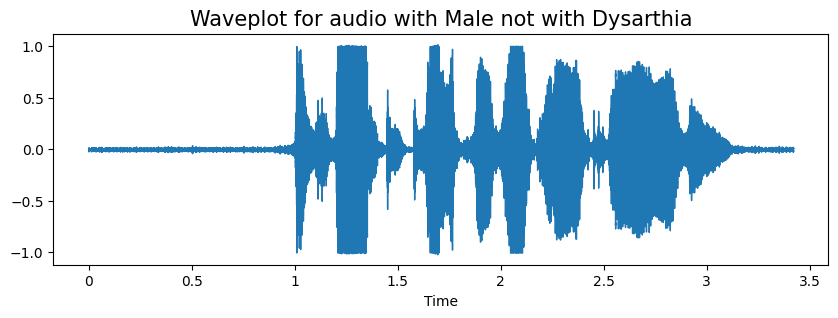

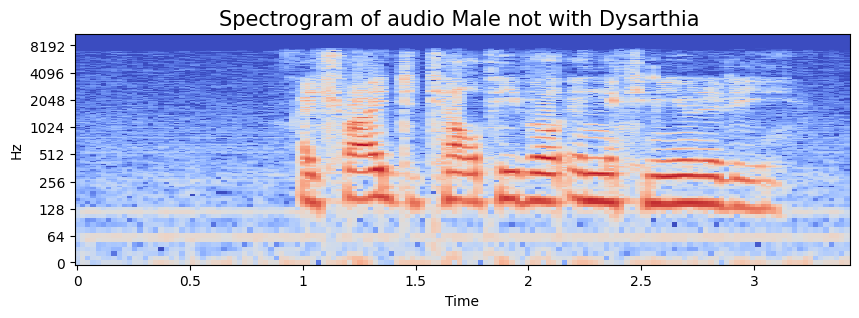

Sum of zero crossing  5133


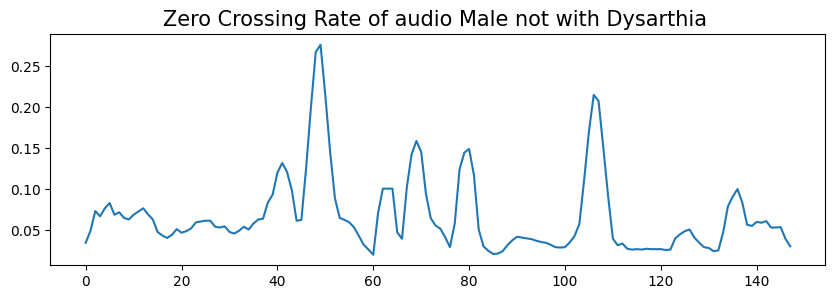

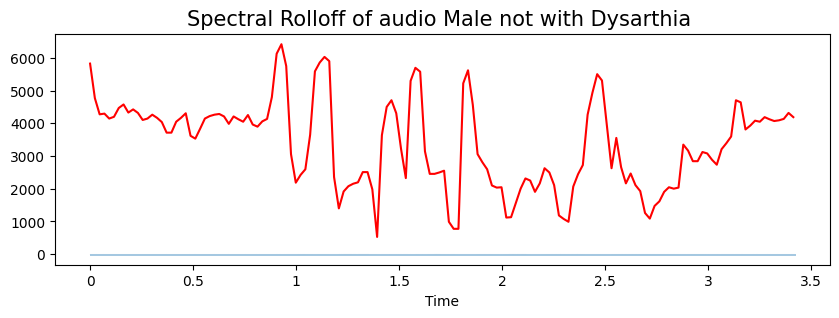

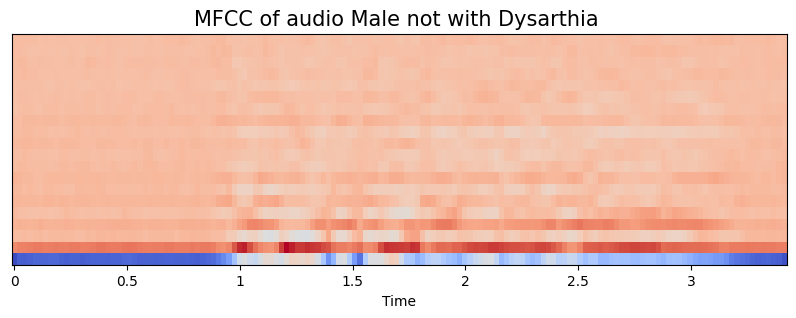

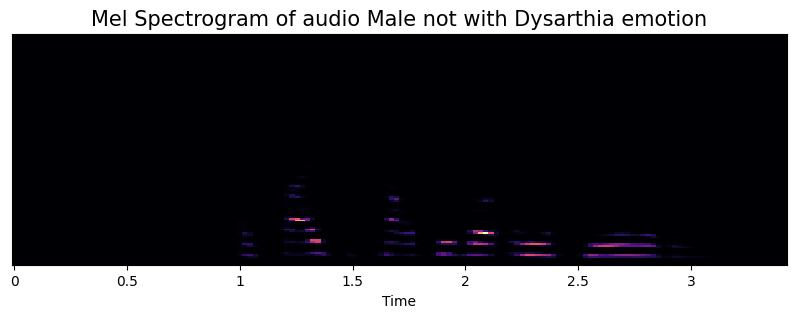

In [ ]:
non_dysarthricMale  = d[(d['gender']=='male') & (d['is_dysarthria']=='non_dysarthria')]
NDM = non_dysarthricMale.sample()
v= NDM.iloc[0].filename
info= "Male not with Dysarthia"
data, sampling_rate = librosa.load(v)
create_waveplot(data, sampling_rate, info)
create_Spectogram(data, sampling_rate, info)
create_Zero_crossing_rate(data, sampling_rate, info)
create_Spectral_rolloff(data, sampling_rate, info)
create_mfcc(data, sampling_rate, info)
create_mel_Spectogram(data, sampling_rate, info)

Audio(v)

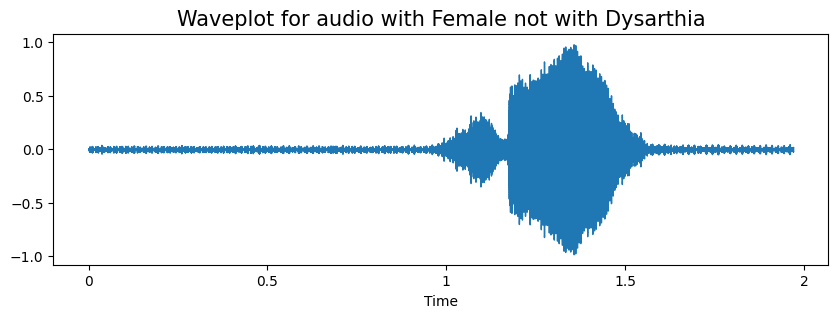

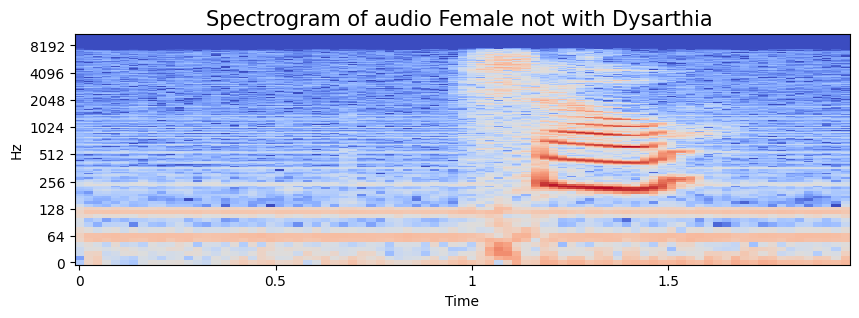

Sum of zero crossing  4590


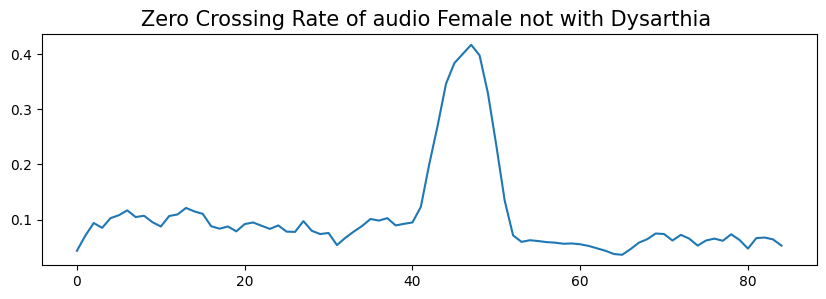

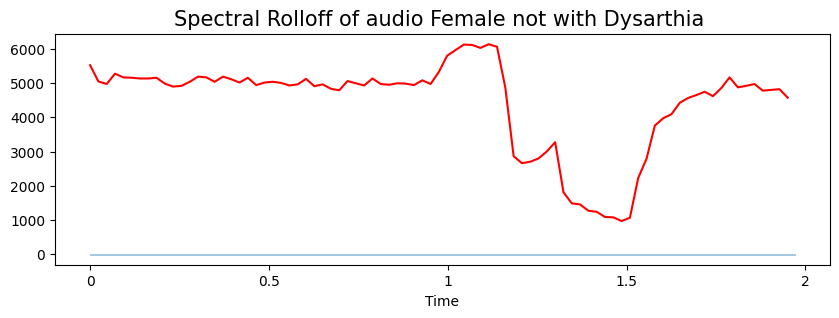

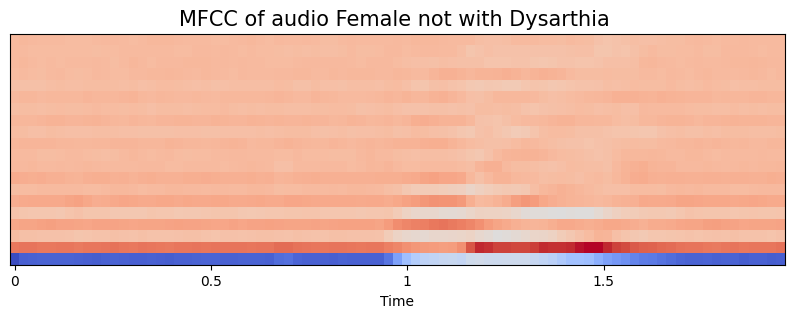

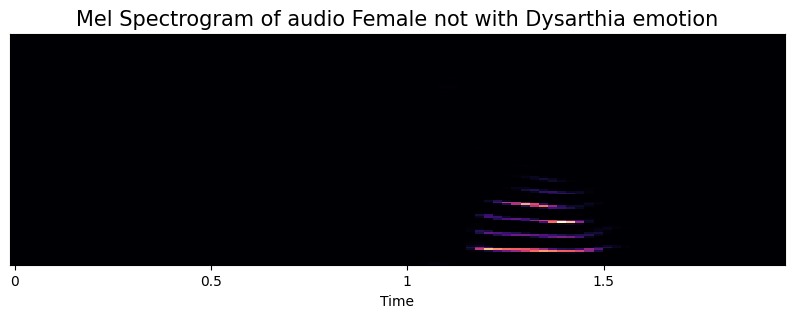

In [ ]:
non_dysarthricFemale = d[(d['gender']=='female') & (d['is_dysarthria']=='non_dysarthria')]
NDF= non_dysarthricFemale.sample()
w= NDF.iloc[0].filename
info= "Female not with Dysarthia"
data, sampling_rate = librosa.load(w)
create_waveplot(data, sampling_rate, info)
create_Spectogram(data, sampling_rate, info)
create_Zero_crossing_rate(data, sampling_rate, info)
create_Spectral_rolloff(data, sampling_rate, info)
create_mfcc(data, sampling_rate, info)
create_mel_Spectogram(data, sampling_rate, info)

Audio(w)

In [ ]:
#FEATURE EXTRACTION USING MFCC

In [ ]:
def mfcc_features_extract(x):

    features_mfcc = []
    try:
        x , sr = librosa.load(x)
        features_mfcc = librosa.feature.mfcc(y=x, sr=sr, n_mfcc=128)
        features_mfcc = np.mean(features_mfcc.T,axis=0)
    except:
        print('Error reading audio')
    return features_mfcc

In [ ]:
N= d['filename'].apply(lambda a: mfcc_features_extract(a))

Error reading audio


In [ ]:
N= N.tolist()
N= pd.DataFrame(N)

In [ ]:
N.head(10)

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,-221.788269,101.259232,-16.548132,38.492065,-13.595653,20.772556,-5.536349,10.410690,1.962461,-0.799048,...,1.363241,0.962193,0.744855,1.058080,0.388451,0.081758,0.546172,0.594357,0.170033,-0.219215
1,-299.520081,109.872574,-17.097267,38.854969,-16.881130,22.959133,1.824228,18.724186,3.448541,4.455821,...,1.329316,1.105589,1.056284,1.252576,0.027333,-1.368948,-0.037859,0.020661,-0.082124,-0.744831
2,-302.950043,112.048477,-23.679882,44.887421,-22.434727,26.299335,0.811477,18.210291,4.344697,4.912156,...,0.993410,0.844332,0.530004,1.018391,0.055385,-1.472088,0.295324,0.191228,-0.224301,-0.582725
3,-210.861603,116.504486,-35.046497,37.670425,-27.112514,25.593725,-7.511986,13.140750,-0.587347,4.138087,...,1.068848,0.630752,0.898457,0.721398,0.174576,-0.090706,0.001523,0.360464,-0.075449,-0.259715
4,-280.227203,104.505035,-17.209877,45.064884,-15.542122,28.115065,-3.449209,16.841436,4.573242,1.738296,...,1.486205,1.596206,0.970084,0.732015,0.547593,-0.152664,0.131893,-0.288228,-0.468570,-0.461726
5,-278.383331,100.406921,-13.620474,43.185123,-20.576672,28.462549,-2.768836,17.264555,4.051349,3.575871,...,0.977129,1.273096,0.668057,0.650627,0.417459,-0.521613,0.246112,0.033733,-0.392852,-0.575429
6,-259.562347,105.800743,-18.014462,38.990738,-20.763636,25.383530,-0.809449,13.378078,-0.644927,2.570261,...,1.224453,1.161034,0.929469,1.102943,0.644086,-0.338245,0.459481,0.518778,0.046222,0.006183
7,-259.700928,118.702637,-11.923311,32.010925,-19.615616,17.748121,2.262589,7.991323,-0.416304,6.148558,...,0.460280,-0.072305,0.310545,0.476454,-0.068659,-0.962328,-0.111008,0.328578,-0.305426,-0.260911
8,-299.119904,110.268257,-20.741718,36.179424,-18.494825,23.903576,6.911688,20.933392,5.860124,4.909704,...,1.272139,1.085124,0.771311,0.927248,-0.044614,-1.266808,0.003891,-0.357512,-0.496980,-0.654187
9,-308.697906,116.575424,-24.820480,39.277863,-12.851314,4.379052,-12.422794,-5.025279,-2.216658,0.652393,...,0.677493,0.953369,0.291450,0.049953,-0.126011,-0.029416,-0.131503,-0.249922,-0.080363,0.224781


In [ ]:
N['Dysarthia'] = d['is_dysarthria']

In [ ]:
N.loc[N['Dysarthia']=='non_dysarthria','Dysarthia'] = 0
N.loc[N['Dysarthia']=='dysarthria','Dysarthia'] = 1

In [ ]:
N["Dysarthia"].value_counts()

Dysarthia
0    1000
1    1000
Name: count, dtype: int64

In [ ]:
N.isna().sum().sum()

128

In [ ]:
N = N.dropna()

In [ ]:
N["Dysarthia"].value_counts()

Dysarthia
0    1000
1     999
Name: count, dtype: int64

In [ ]:
X = N.drop(['Dysarthia'],axis=1)
y = N['Dysarthia'].astype(float)

In [ ]:
print("Shape of X and y: ", X.shape, y.shape)

Shape of X and y:  (1999, 128) (1999,)


In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1)

In [ ]:
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_val_scaled = sc.transform(X_val)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [ ]:
X_train_scaled = X_train_scaled.reshape(-1,16,8,1)
X_val_scaled = X_val_scaled.reshape(-1,16,8,1)
print("Shape of X_train and X_test: ", X_train_scaled.shape, X_val_scaled.shape)

Shape of X_train and X_test:  (1799, 16, 8, 1) (200, 16, 8, 1)


**CNN**

In [ ]:
model_1 = Sequential([
    InputLayer(input_shape=(16, 8, 1)),
    Conv2D(filters=16, kernel_size=(3, 3), activation='relu', padding = "same"),
    MaxPooling2D(2, 2),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = "same"),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [ ]:
model_1.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 16, 8, 16)         160       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 8, 4, 16)          0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 8, 4, 64)          9280      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 4, 2, 64)          0         
 g2D)                                                            
                                                                 
 flatten_6 (Flatten)         (None, 512)               0         
                                                                 
 dense_42 (Dense)            (None, 32)              

In [ ]:
model_1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history_1 = model_1.fit(X_train_scaled, y_train, epochs=100, validation_data=(X_val_scaled,y_val))

Epoch 1/100
57/57 [==============================] - 2s 10ms/step - loss: 0.5200 - accuracy: 0.7499 - val_loss: 0.3959 - val_accuracy: 0.8250
Epoch 2/100
57/57 [==============================] - 0s 7ms/step - loss: 0.3033 - accuracy: 0.8766 - val_loss: 0.2433 - val_accuracy: 0.9200
Epoch 3/100
57/57 [==============================] - 0s 8ms/step - loss: 0.1614 - accuracy: 0.9466 - val_loss: 0.1610 - val_accuracy: 0.9450
Epoch 4/100
57/57 [==============================] - 1s 13ms/step - loss: 0.0905 - accuracy: 0.9778 - val_loss: 0.1355 - val_accuracy: 0.9600
Epoch 5/100
57/57 [==============================] - 1s 12ms/step - loss: 0.0515 - accuracy: 0.9889 - val_loss: 0.1096 - val_accuracy: 0.9750
Epoch 6/100
57/57 [==============================] - 1s 13ms/step - loss: 0.0377 - accuracy: 0.9906 - val_loss: 0.0981 - val_accuracy: 0.9800
Epoch 7/100
57/57 [==============================] - 1s 11ms/step - loss: 0.0244 - accuracy: 0.9950 - val_loss: 0.2345 - val_accuracy: 0.9650
Epoch 8/

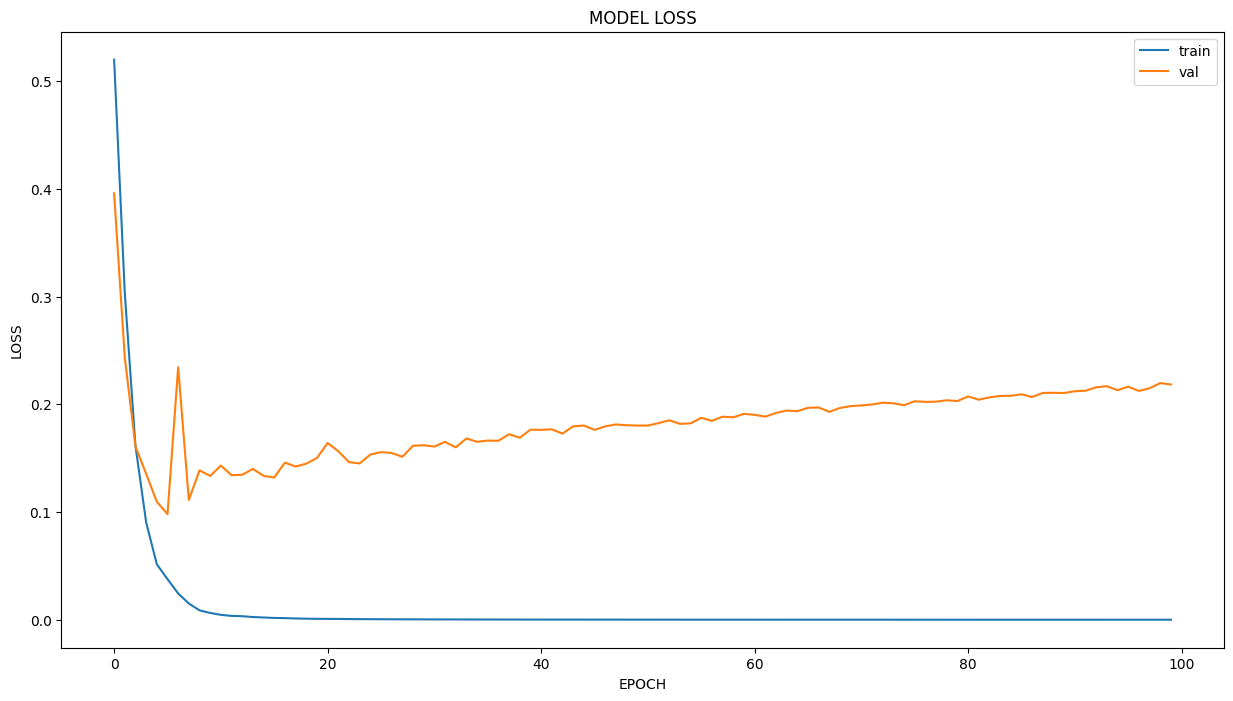

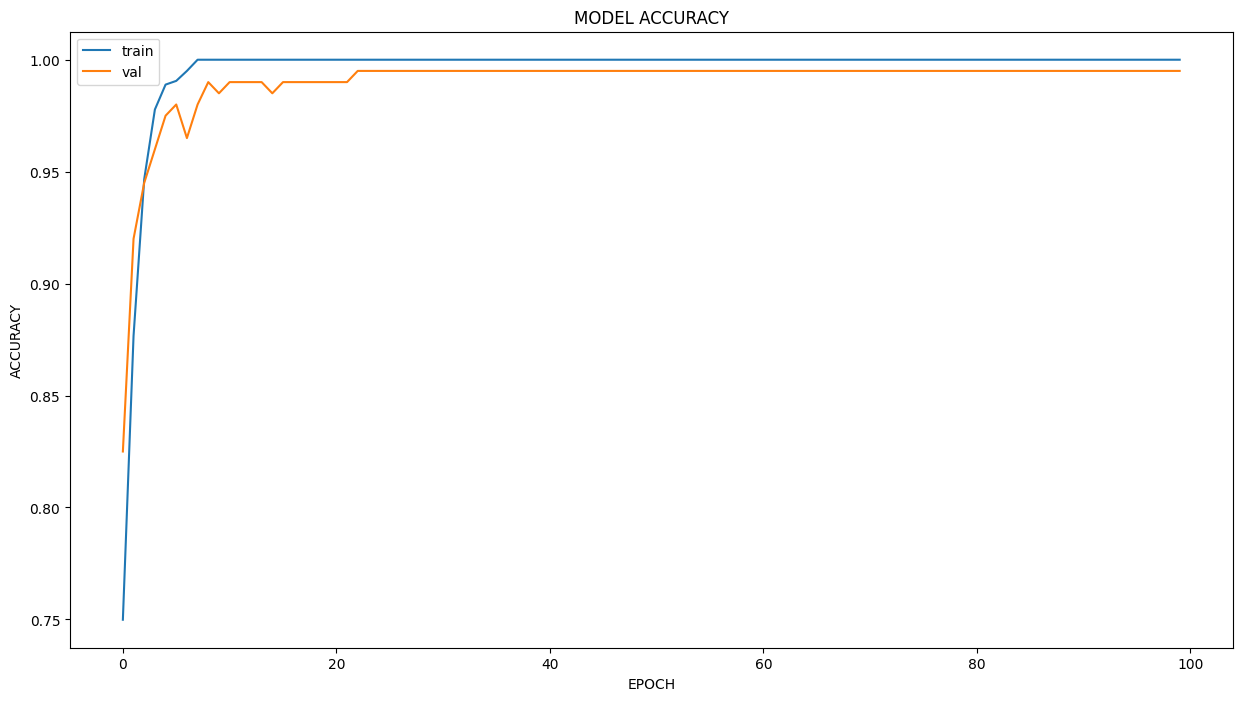

In [ ]:
plt.figure(figsize=(15,8))
plt.plot(history_1.history['loss'])
plt.plot(history_1.history['val_loss'])
plt.xlabel('EPOCH')
plt.ylabel('LOSS')
plt.title('MODEL LOSS')
plt.legend(['train', 'val'])
plt.show()

plt.figure(figsize=(15,8))
plt.plot(history_1.history['accuracy'])
plt.plot(history_1.history['val_accuracy'])
plt.xlabel('EPOCH')
plt.ylabel('ACCURACY')
plt.title('MODEL ACCURACY')
plt.legend(['train', 'val'])
plt.show()

In [ ]:
ypred_1 = model_1.predict(X_val_scaled)

7/7 [==============================] - 0s 3ms/step


In [ ]:
roc_auc_score(y_val,ypred_1)

0.9924812030075187

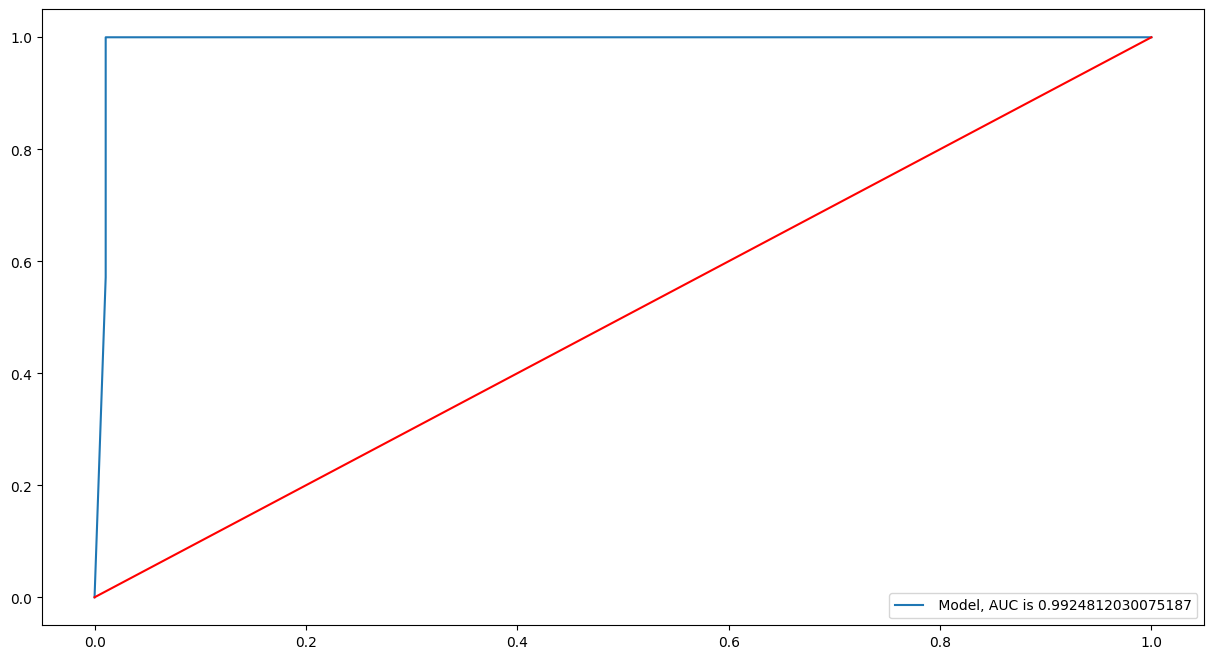

In [ ]:
plt.figure(figsize=(15,8))
f, t, _ = roc_curve(y_val,  ypred_1)
AUC_score = roc_auc_score(y_val, ypred_1)
plt.plot(f,t,label=" Model, AUC is "+str(AUC_score))
plt.plot([0, 1], [0, 1], color="red")
plt.legend(loc=4)
plt.show()

In [ ]:
ypred_1[ypred_1>=0.5] = 1
ypred_1[ypred_1<0.5] = 0

print("Recall Score ",recall_score(y_val,ypred_1))

Recall Score  1.0


In [ ]:
print(classification_report(y_val,ypred_1))

              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99        95
         1.0       0.99      1.00      1.00       105

    accuracy                           0.99       200
   macro avg       1.00      0.99      0.99       200
weighted avg       1.00      0.99      0.99       200



Testing Accuracy =  99.5


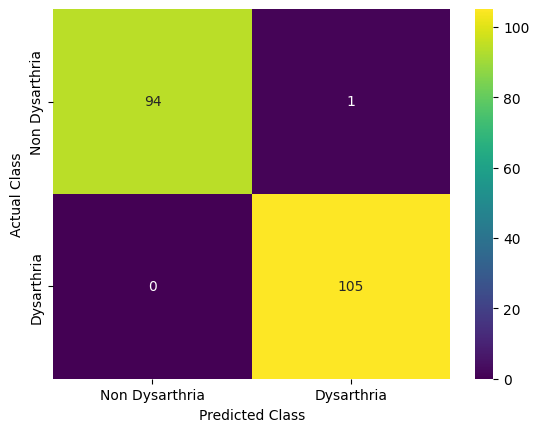

In [ ]:
print("Testing Accuracy = ",accuracy_score(y_val,ypred_1)*100)
sns.heatmap(confusion_matrix(y_val, ypred_1),cmap='viridis',annot=True,fmt='.3g',
            xticklabels=['Non Dysarthria','Dysarthria'],yticklabels=['Non Dysarthria','Dysarthria'])
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.show()


**LSTM**

In [ ]:
model_2 = Sequential([
    LSTM(units=64, input_shape=(16,8)),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

model_2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model_2.summary()

Model: "sequential_33"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_12 (LSTM)              (None, 64)                18688     
                                                                 
 dense_72 (Dense)            (None, 64)                4160      
                                                                 
 dense_73 (Dense)            (None, 1)                 65        
                                                                 
Total params: 22913 (89.50 KB)
Trainable params: 22913 (89.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
history_2 = model_2.fit(X_train_scaled, y_train, epochs=100, validation_data=(X_val_scaled,y_val))

Epoch 1/100
57/57 [==============================] - 4s 21ms/step - loss: 0.5428 - accuracy: 0.7421 - val_loss: 0.4156 - val_accuracy: 0.8150
Epoch 2/100
57/57 [==============================] - 1s 10ms/step - loss: 0.3055 - accuracy: 0.8749 - val_loss: 0.2861 - val_accuracy: 0.8900
Epoch 3/100
57/57 [==============================] - 1s 10ms/step - loss: 0.2191 - accuracy: 0.9144 - val_loss: 0.2026 - val_accuracy: 0.9400
Epoch 4/100
57/57 [==============================] - 1s 10ms/step - loss: 0.1604 - accuracy: 0.9400 - val_loss: 0.1898 - val_accuracy: 0.9550
Epoch 5/100
57/57 [==============================] - 1s 10ms/step - loss: 0.1342 - accuracy: 0.9516 - val_loss: 0.1638 - val_accuracy: 0.9450
Epoch 6/100
57/57 [==============================] - 1s 11ms/step - loss: 0.1066 - accuracy: 0.9578 - val_loss: 0.1327 - val_accuracy: 0.9700
Epoch 7/100
57/57 [==============================] - 1s 10ms/step - loss: 0.0911 - accuracy: 0.9639 - val_loss: 0.1338 - val_accuracy: 0.9600
Epoch 

In [ ]:
ypred_2 = model_2.predict(X_val_scaled)

7/7 [==============================] - 0s 4ms/step


In [ ]:
roc_auc_score(y_val,ypred_2)

0.9927819548872181

In [ ]:
ypred_2[ypred_2>=0.5] = 1
ypred_2[ypred_2<0.5] = 0

print("Recall Score ",recall_score(y_val,ypred_2))

Recall Score  0.9904761904761905


In [ ]:
print(classification_report(y_val,ypred_2))

              precision    recall  f1-score   support

         0.0       0.99      0.96      0.97        95
         1.0       0.96      0.99      0.98       105

    accuracy                           0.97       200
   macro avg       0.98      0.97      0.97       200
weighted avg       0.98      0.97      0.97       200



Testing Accuracy =  97.5


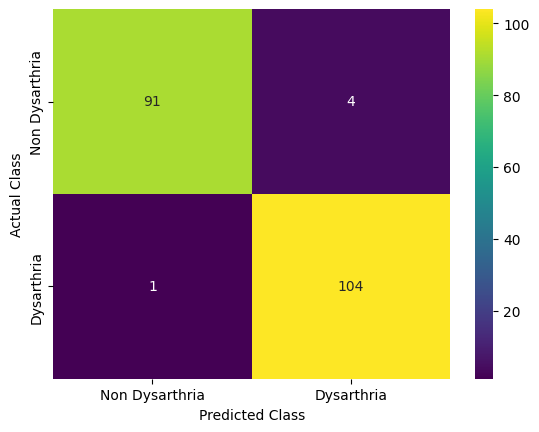

In [ ]:
print("Testing Accuracy = ",accuracy_score(y_val,ypred_2)*100)
sns.heatmap(confusion_matrix(y_val, ypred_2),cmap='viridis',annot=True,fmt='.3g',
            xticklabels=['Non Dysarthria','Dysarthria'],yticklabels=['Non Dysarthria','Dysarthria'])
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.show()

**GRU**

In [ ]:
model_3 = Sequential([
    GRU(64, input_shape=(16, 8)),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

model_3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model_3.summary()

Model: "sequential_34"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_6 (GRU)                 (None, 64)                14208     
                                                                 
 dense_74 (Dense)            (None, 64)                4160      
                                                                 
 dense_75 (Dense)            (None, 1)                 65        
                                                                 
Total params: 18433 (72.00 KB)
Trainable params: 18433 (72.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
history_3 = model_3.fit(X_train_scaled, y_train, epochs=100, validation_data=(X_val_scaled,y_val))

Epoch 1/100
57/57 [==============================] - 4s 28ms/step - loss: 0.5681 - accuracy: 0.6954 - val_loss: 0.4648 - val_accuracy: 0.7850
Epoch 2/100
57/57 [==============================] - 1s 10ms/step - loss: 0.3818 - accuracy: 0.8371 - val_loss: 0.3151 - val_accuracy: 0.8550
Epoch 3/100
57/57 [==============================] - 1s 10ms/step - loss: 0.2581 - accuracy: 0.9061 - val_loss: 0.2268 - val_accuracy: 0.9200
Epoch 4/100
57/57 [==============================] - 1s 11ms/step - loss: 0.1795 - accuracy: 0.9350 - val_loss: 0.1925 - val_accuracy: 0.9250
Epoch 5/100
57/57 [==============================] - 1s 10ms/step - loss: 0.1435 - accuracy: 0.9522 - val_loss: 0.1769 - val_accuracy: 0.9450
Epoch 6/100
57/57 [==============================] - 1s 11ms/step - loss: 0.1178 - accuracy: 0.9589 - val_loss: 0.1585 - val_accuracy: 0.9450
Epoch 7/100
57/57 [==============================] - 1s 10ms/step - loss: 0.1015 - accuracy: 0.9633 - val_loss: 0.1547 - val_accuracy: 0.9550
Epoch 

In [ ]:
ypred_3 = model_3.predict(X_val_scaled)

7/7 [==============================] - 0s 5ms/step


In [ ]:
roc_auc_score(y_val,ypred_3)

0.9906766917293233

In [ ]:
ypred_3[ypred_3>=0.5] = 1
ypred_3[ypred_3<0.5] = 0

print("Recall Score ",recall_score(y_val,ypred_3))

Recall Score  0.9809523809523809


In [ ]:
print(classification_report(y_val,ypred_3))

              precision    recall  f1-score   support

         0.0       0.98      0.97      0.97        95
         1.0       0.97      0.98      0.98       105

    accuracy                           0.97       200
   macro avg       0.98      0.97      0.97       200
weighted avg       0.98      0.97      0.97       200



Testing Accuracy =  97.5


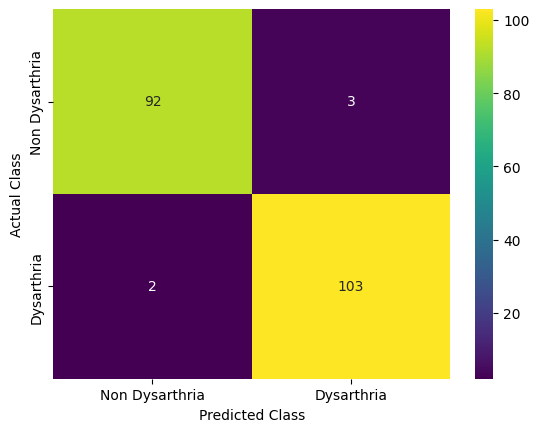

In [ ]:
print("Testing Accuracy = ",accuracy_score(y_val,ypred_3)*100)
sns.heatmap(confusion_matrix(y_val, ypred_3),cmap='viridis',annot=True,fmt='.3g',
            xticklabels=['Non Dysarthria','Dysarthria'],yticklabels=['Non Dysarthria','Dysarthria'])
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.show()

**BiLSTM**

In [ ]:
model_4 = Sequential([
    Bidirectional(LSTM(64), input_shape=(16, 8)),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

model_4.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model_4.summary()

Model: "sequential_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_5 (Bidirecti  (None, 128)               37376     
 onal)                                                           
                                                                 
 dense_65 (Dense)            (None, 64)                8256      
                                                                 
 dense_66 (Dense)            (None, 1)                 65        
                                                                 
Total params: 45697 (178.50 KB)
Trainable params: 45697 (178.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
history_4 = model_4.fit(X_train_scaled, y_train, epochs=100, validation_data=(X_val_scaled,y_val))

Epoch 1/100
57/57 [==============================] - 7s 32ms/step - loss: 0.4822 - accuracy: 0.7838 - val_loss: 0.3374 - val_accuracy: 0.8350
Epoch 2/100
57/57 [==============================] - 1s 16ms/step - loss: 0.2555 - accuracy: 0.8994 - val_loss: 0.2029 - val_accuracy: 0.9050
Epoch 3/100
57/57 [==============================] - 1s 15ms/step - loss: 0.1581 - accuracy: 0.9350 - val_loss: 0.1448 - val_accuracy: 0.9550
Epoch 4/100
57/57 [==============================] - 1s 16ms/step - loss: 0.1050 - accuracy: 0.9589 - val_loss: 0.1101 - val_accuracy: 0.9700
Epoch 5/100
57/57 [==============================] - 1s 16ms/step - loss: 0.0729 - accuracy: 0.9722 - val_loss: 0.1126 - val_accuracy: 0.9750
Epoch 6/100
57/57 [==============================] - 1s 15ms/step - loss: 0.0571 - accuracy: 0.9772 - val_loss: 0.1075 - val_accuracy: 0.9550
Epoch 7/100
57/57 [==============================] - 1s 16ms/step - loss: 0.0381 - accuracy: 0.9844 - val_loss: 0.1065 - val_accuracy: 0.9550
Epoch 

In [ ]:
ypred_4 = model_4.predict(X_val_scaled)

7/7 [==============================] - 1s 5ms/step


In [ ]:
roc_auc_score(y_val,ypred_4)

0.9962406015037594

In [ ]:
ypred_4[ypred_4>=0.5] = 1
ypred_4[ypred_4<0.5] = 0

print("Recall Score ",recall_score(y_val,ypred_4))

Recall Score  0.9809523809523809


In [ ]:
print(classification_report(y_val,ypred_4))

              precision    recall  f1-score   support

         0.0       0.98      0.99      0.98        95
         1.0       0.99      0.98      0.99       105

    accuracy                           0.98       200
   macro avg       0.98      0.99      0.98       200
weighted avg       0.99      0.98      0.99       200



Testing Accuracy =  98.5


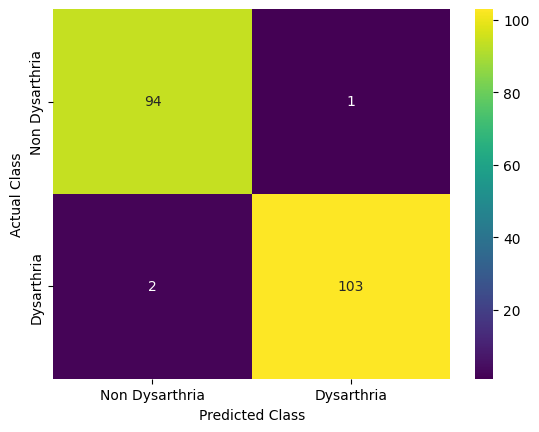

In [ ]:
print("Testing Accuracy = ",accuracy_score(y_val,ypred_4)*100)
sns.heatmap(confusion_matrix(y_val, ypred_4),cmap='viridis',annot=True,fmt='.3g',
            xticklabels=['Non Dysarthria','Dysarthria'],yticklabels=['Non Dysarthria','Dysarthria'])
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.show()

**RNN**

In [ ]:
model_5 = Sequential([
    SimpleRNN(64, input_shape=(16, 8)),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

model_5.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model_5.summary()

Model: "sequential_31"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_5 (SimpleRNN)    (None, 64)                4672      
                                                                 
 dense_67 (Dense)            (None, 64)                4160      
                                                                 
 dense_68 (Dense)            (None, 1)                 65        
                                                                 
Total params: 8897 (34.75 KB)
Trainable params: 8897 (34.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
history_5 = model_5.fit(X_train_scaled, y_train, epochs=100, validation_data=(X_val_scaled,y_val))

Epoch 1/100
57/57 [==============================] - 2s 11ms/step - loss: 0.4323 - accuracy: 0.7993 - val_loss: 0.2453 - val_accuracy: 0.9150
Epoch 2/100
57/57 [==============================] - 0s 6ms/step - loss: 0.1872 - accuracy: 0.9394 - val_loss: 0.1425 - val_accuracy: 0.9550
Epoch 3/100
57/57 [==============================] - 0s 7ms/step - loss: 0.1070 - accuracy: 0.9661 - val_loss: 0.1048 - val_accuracy: 0.9700
Epoch 4/100
57/57 [==============================] - 1s 10ms/step - loss: 0.0667 - accuracy: 0.9822 - val_loss: 0.0856 - val_accuracy: 0.9750
Epoch 5/100
57/57 [==============================] - 1s 10ms/step - loss: 0.0444 - accuracy: 0.9883 - val_loss: 0.0583 - val_accuracy: 0.9800
Epoch 6/100
57/57 [==============================] - 1s 9ms/step - loss: 0.0233 - accuracy: 0.9956 - val_loss: 0.0604 - val_accuracy: 0.9800
Epoch 7/100
57/57 [==============================] - 1s 10ms/step - loss: 0.0137 - accuracy: 0.9978 - val_loss: 0.0794 - val_accuracy: 0.9700
Epoch 8/1

In [ ]:
ypred_5 = model_5.predict(X_val_scaled)

7/7 [==============================] - 0s 3ms/step


In [ ]:
roc_auc_score(y_val,ypred_5)

0.9950877192982457

In [ ]:
ypred_5[ypred_5>=0.5] = 1
ypred_5[ypred_5<0.5] = 0
print("Recall Score ",recall_score(y_val,ypred_5))

Recall Score  0.9809523809523809


In [ ]:
print(classification_report(y_val,ypred_5))

              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98        95
         1.0       0.98      0.98      0.98       105

    accuracy                           0.98       200
   macro avg       0.98      0.98      0.98       200
weighted avg       0.98      0.98      0.98       200



Testing Accuracy =  98.0


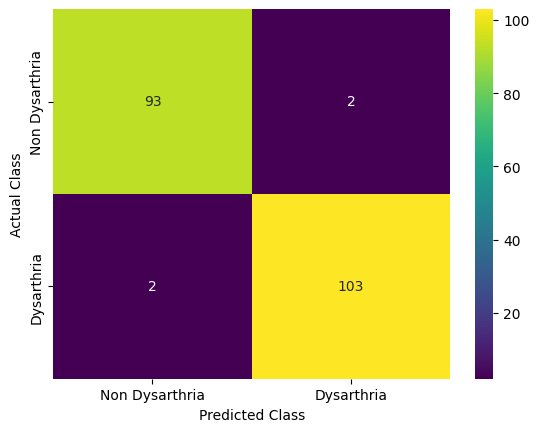

In [ ]:
print("Testing Accuracy = ",accuracy_score(y_val,ypred_5)*100)
sns.heatmap(confusion_matrix(y_val, ypred_5),cmap='viridis',annot=True,fmt='.3g',
            xticklabels=['Non Dysarthria','Dysarthria'],yticklabels=['Non Dysarthria','Dysarthria'])
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.show()

**DNN**

In [ ]:
model_6 = Sequential([
    Flatten(input_shape=(16, 8)),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1, activation='softmax')
])

model_6.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model_6.summary()

Model: "sequential_32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_8 (Flatten)         (None, 128)               0         
                                                                 
 dense_69 (Dense)            (None, 64)                8256      
                                                                 
 dense_70 (Dense)            (None, 64)                4160      
                                                                 
 dense_71 (Dense)            (None, 1)                 65        
                                                                 
Total params: 12481 (48.75 KB)
Trainable params: 12481 (48.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
history_6 = model_6.fit(X_train_scaled, y_train, epochs=100, validation_data=(X_val_scaled,y_val))

Epoch 1/100
57/57 [==============================] - 1s 7ms/step - loss: 0.3423 - accuracy: 0.4969 - val_loss: 0.1506 - val_accuracy: 0.5250
Epoch 2/100
57/57 [==============================] - 0s 4ms/step - loss: 0.0916 - accuracy: 0.4969 - val_loss: 0.0497 - val_accuracy: 0.5250
Epoch 3/100
57/57 [==============================] - 0s 4ms/step - loss: 0.0376 - accuracy: 0.4969 - val_loss: 0.0252 - val_accuracy: 0.5250
Epoch 4/100
57/57 [==============================] - 0s 4ms/step - loss: 0.0191 - accuracy: 0.4969 - val_loss: 0.0217 - val_accuracy: 0.5250
Epoch 5/100
57/57 [==============================] - 0s 4ms/step - loss: 0.0106 - accuracy: 0.4969 - val_loss: 0.0160 - val_accuracy: 0.5250
Epoch 6/100
57/57 [==============================] - 0s 4ms/step - loss: 0.0074 - accuracy: 0.4969 - val_loss: 0.0162 - val_accuracy: 0.5250
Epoch 7/100
57/57 [==============================] - 0s 4ms/step - loss: 0.0059 - accuracy: 0.4969 - val_loss: 0.0151 - val_accuracy: 0.5250
Epoch 8/100
5

In [ ]:
ypred_6 = model_6.predict(X_val_scaled)

7/7 [==============================] - 0s 3ms/step


In [ ]:
roc_auc_score(y_val,ypred_6)

0.5

In [ ]:
ypred_6[ypred_6>=0.5] = 1
ypred_6[ypred_6<0.5] = 0
print("Recall Score ",recall_score(y_val,ypred_6))

Recall Score  1.0


In [ ]:
print(classification_report(y_val,ypred_6))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        95
         1.0       0.53      1.00      0.69       105

    accuracy                           0.53       200
   macro avg       0.26      0.50      0.34       200
weighted avg       0.28      0.53      0.36       200



Testing Accuracy =  52.5


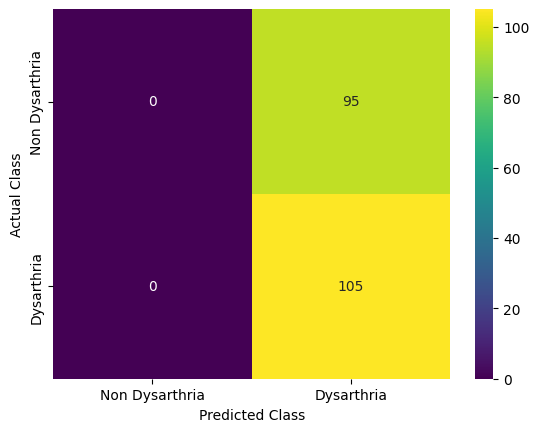

In [ ]:
print("Testing Accuracy = ",accuracy_score(y_val,ypred_6)*100)
sns.heatmap(confusion_matrix(y_val, ypred_6),cmap='viridis',annot=True,fmt='.3g',
            xticklabels=['Non Dysarthria','Dysarthria'],yticklabels=['Non Dysarthria','Dysarthria'])
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.show()

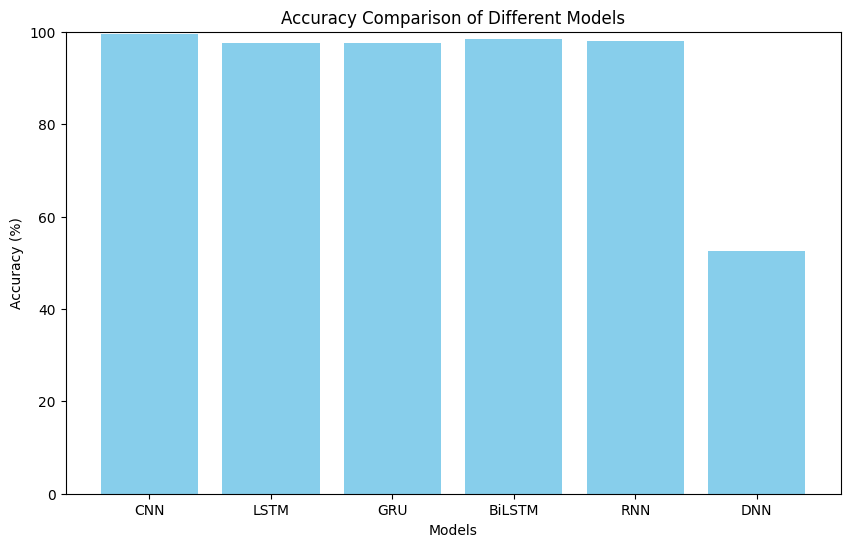

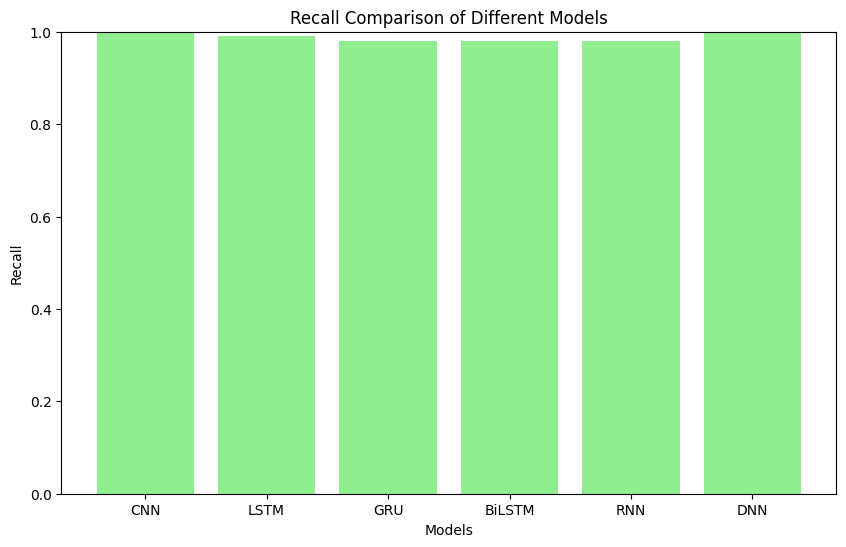

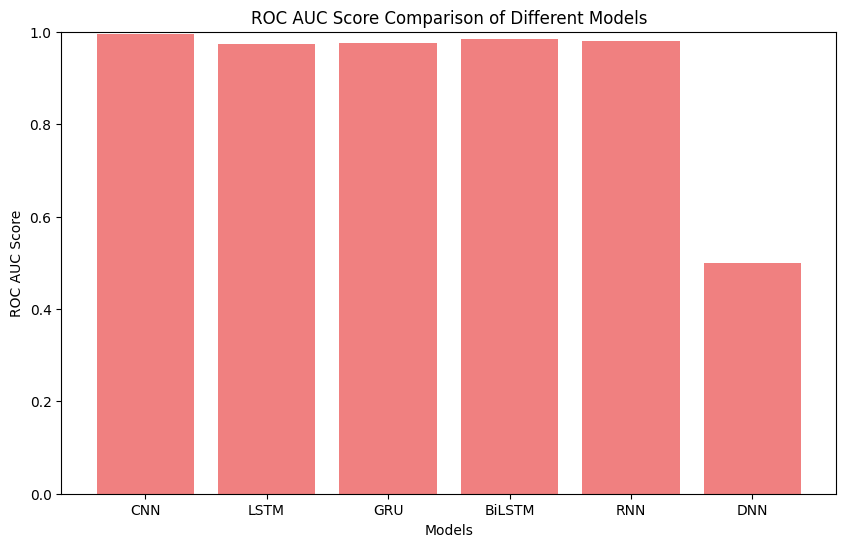

In [ ]:
import matplotlib.pyplot as plt

accuracies = [accuracy_score(y_val,ypred_1)*100, accuracy_score(y_val,ypred_2)*100, accuracy_score(y_val,ypred_3)*100,
              accuracy_score(y_val,ypred_4)*100, accuracy_score(y_val,ypred_5)*100, accuracy_score(y_val,ypred_6)*100]
models = ['CNN', 'LSTM', 'GRU', 'BiLSTM', 'RNN', 'DNN']

plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color='skyblue')
plt.xlabel('Models')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy Comparison of Different Models')
plt.ylim([0, 100])
plt.show()

recalls = [recall_score(y_val,ypred_1), recall_score(y_val,ypred_2), recall_score(y_val,ypred_3),
           recall_score(y_val,ypred_4), recall_score(y_val,ypred_5), recall_score(y_val,ypred_6)]

plt.figure(figsize=(10, 6))
plt.bar(models, recalls, color='lightgreen')
plt.xlabel('Models')
plt.ylabel('Recall')
plt.title('Recall Comparison of Different Models')
plt.ylim([0, 1])
plt.show()

auc_scores = [roc_auc_score(y_val,ypred_1), roc_auc_score(y_val,ypred_2), roc_auc_score(y_val,ypred_3),
              roc_auc_score(y_val,ypred_4), roc_auc_score(y_val,ypred_5), roc_auc_score(y_val,ypred_6)]

plt.figure(figsize=(10, 6))
plt.bar(models, auc_scores, color='lightcoral')
plt.xlabel('Models')
plt.ylabel('ROC AUC Score')
plt.title('ROC AUC Score Comparison of Different Models')
plt.ylim([0, 1])
plt.show()


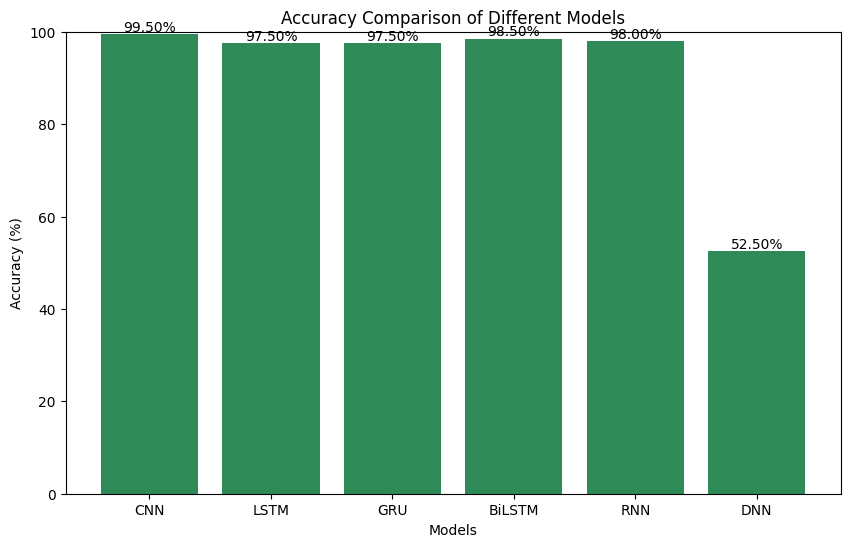

In [ ]:
models = ['CNN', 'LSTM', 'GRU', 'BiLSTM', 'RNN', 'DNN']

accuracies = [accuracy_score(y_val,ypred_1)*100, accuracy_score(y_val,ypred_2)*100, accuracy_score(y_val,ypred_3)*100,
              accuracy_score(y_val,ypred_4)*100, accuracy_score(y_val,ypred_5)*100, accuracy_score(y_val,ypred_6)*100]

plt.figure(figsize=(10,6))
plt.bar(models, accuracies, color='seagreen')
plt.xlabel('Models')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy Comparison of Different Models')
plt.ylim([0, 100])

for i in range(len(models)):
    plt.text(i, accuracies[i], f"{accuracies[i]:.2f}%", ha='center', va='bottom')

plt.show()


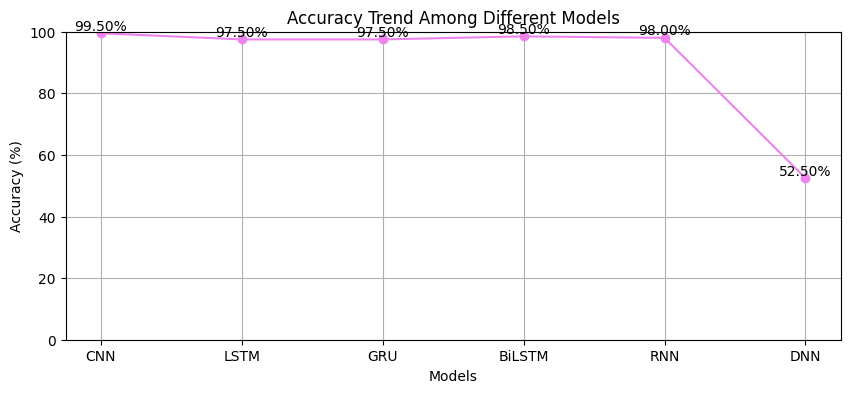

In [ ]:
models = ['CNN', 'LSTM', 'GRU', 'BiLSTM', 'RNN', 'DNN']

accuracies = [accuracy_score(y_val,ypred_1)*100, accuracy_score(y_val,ypred_2)*100, accuracy_score(y_val,ypred_3)*100,
              accuracy_score(y_val,ypred_4)*100, accuracy_score(y_val,ypred_5)*100, accuracy_score(y_val,ypred_6)*100]

plt.figure(figsize=(10, 4))
plt.plot(models, accuracies, marker='o', color='violet', linestyle='-')
plt.xlabel('Models')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy Trend Among Different Models')
plt.ylim([0, 100])

for i in range(len(models)):
    plt.text(models[i], accuracies[i], f"{accuracies[i]:.2f}%", ha='center', va='bottom')

plt.grid(True)
plt.show()


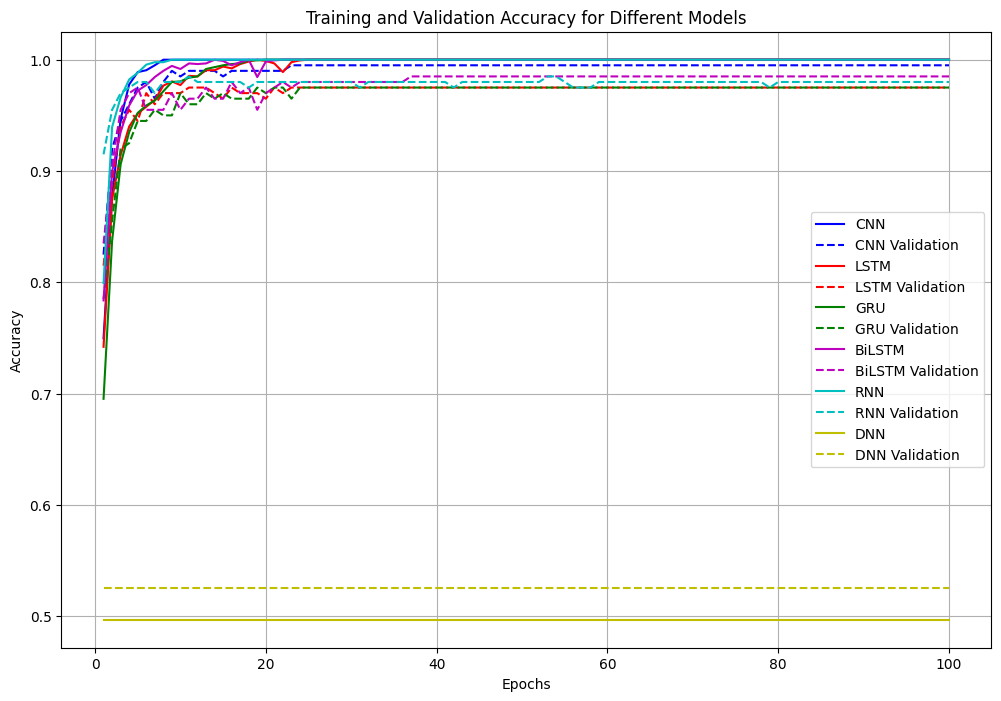

In [ ]:
epochs = range(1, len(history_1.history['accuracy']) + 1)

plt.figure(figsize=(12, 8))

plt.plot(epochs, history_1.history['accuracy'], 'b', label='CNN')
plt.plot(epochs, history_1.history['val_accuracy'], 'b--', label='CNN Validation')

plt.plot(epochs, history_2.history['accuracy'], 'r', label='LSTM')
plt.plot(epochs, history_2.history['val_accuracy'], 'r--', label='LSTM Validation')

plt.plot(epochs, history_3.history['accuracy'], 'g', label='GRU')
plt.plot(epochs, history_3.history['val_accuracy'], 'g--', label='GRU Validation')

plt.plot(epochs, history_4.history['accuracy'], 'm', label='BiLSTM')
plt.plot(epochs, history_4.history['val_accuracy'], 'm--', label='BiLSTM Validation')

plt.plot(epochs, history_5.history['accuracy'], 'c', label='RNN')
plt.plot(epochs, history_5.history['val_accuracy'], 'c--', label='RNN Validation')

plt.plot(epochs, history_6.history['accuracy'], 'y', label='DNN')
plt.plot(epochs, history_6.history['val_accuracy'], 'y--', label='DNN Validation')

plt.title('Training and Validation Accuracy for Different Models')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()
